importing the needed libraries

In [ ]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!git clone https://github.com/nickmccullum/cats-and-dogs.git

Cloning into 'cats-and-dogs'...
remote: Enumerating objects: 10016, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 10016 (delta 0), reused 0 (delta 0), pack-reused 10014
Receiving objects: 100% (10016/10016), 216.39 MiB | 33.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (10008/10008), done.


Preprocessing the Training Data

In [38]:
training_generator = ImageDataGenerator(

                        rescale = 1/255,

                        shear_range = 0.2,

                        zoom_range = 0.2,

                        horizontal_flip = True)

In [39]:
training_set = training_generator.flow_from_directory('/content/cats-and-dogs/training_data',

                                                 target_size = (64, 64),

                                                 batch_size = 32,

                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


In [40]:
print('The training set is = ',training_set)

The training set is =  <keras.src.preprocessing.image.DirectoryIterator object at 0x7c524b3a3160>


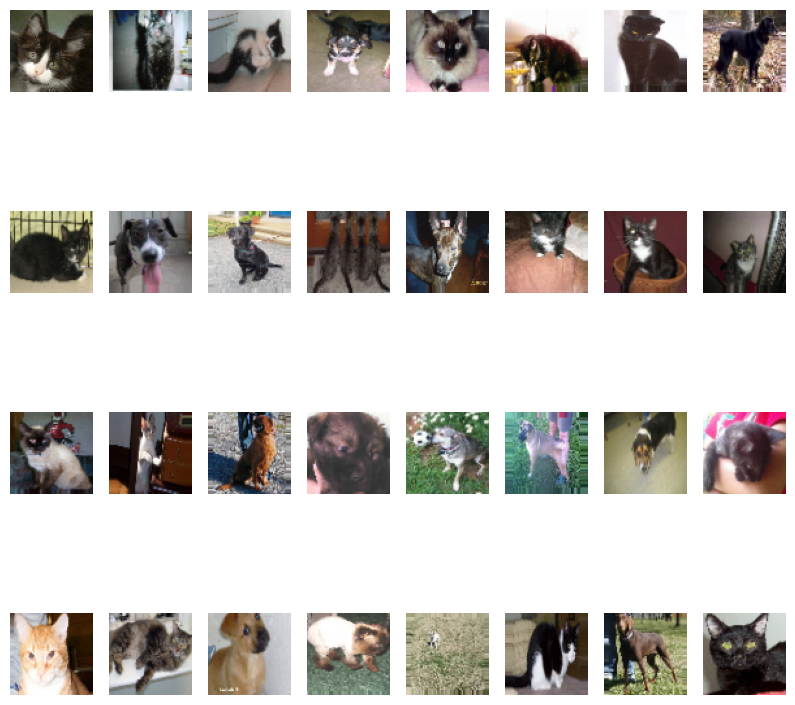

In [41]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the generator
images, labels = next(training_set)

# Plot the images
fig, axes = plt.subplots(4, 8, figsize=(10, 10))  # will display 4*8 images = 32 images =batch size=32
axes = axes.ravel()

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.show()

preprocessing test set

In [42]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_set = test_generator.flow_from_directory('/content/cats-and-dogs/test_data',

                                            target_size = (64, 64),

                                            batch_size = 32,

                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Please print the output of test_generator.flow_from_directory as an image here

Found 2000 images belonging to 2 classes.


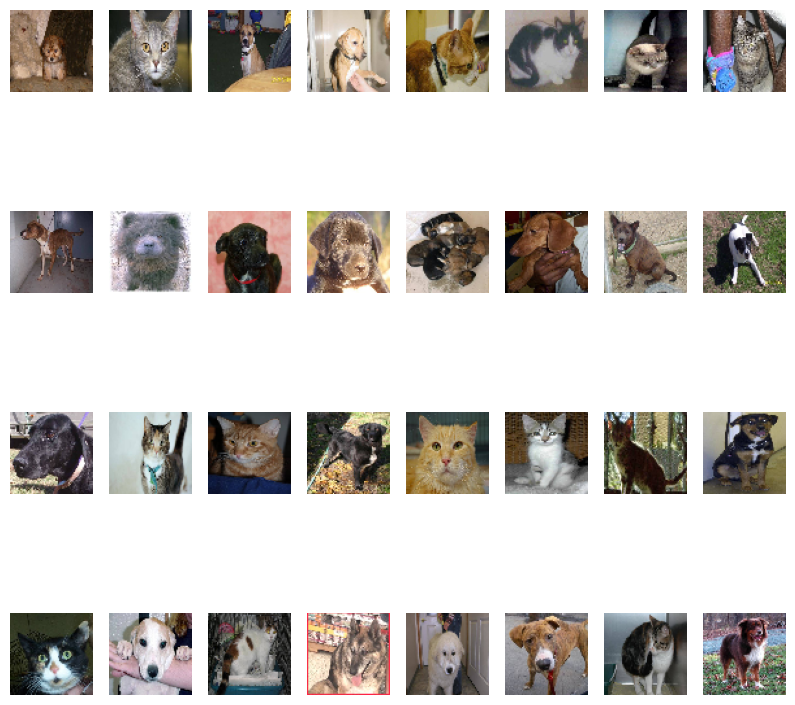

In [43]:
# Print the output
print('Found', test_set.samples, 'images belonging to', test_set.num_classes, 'classes.')

# Retrieve a batch of images and labels from the generator
images, labels = next(test_set)

# Plot the images
fig, axes = plt.subplots(4, 8, figsize=(10, 10))
axes = axes.ravel()

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.show()

preprocessing is complete

Building Our Convolutional Neural Network

In [44]:
cnn = tf.keras.models.Sequential()

Adding Our Convolutional Layer

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

What will be the add command if we wanted to have 64 feature detectors, with a kernel size of 5x5

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu')) #relu is the default activation function

Adding Our Max Pooling Layer

In [47]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

What will be the add command if we wanted to have a max pooling layer which reduces the size of the image by a factor of 4 ?

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=4))

Adding Another Convolutional Layer and Pooling Layer

In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding The Flattening Layer To Our Convolutional Neural Network

In [49]:
cnn.add(tf.keras.layers.Flatten())

Adding The Full Connection Layer To Our Convolutional Neural Network

In [51]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Adding The Output Layer To Our Convolutional Neural Network

In [52]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training the Convolutional Neural Network

Epoch 1/10
250/250 [==============================] - 286s 1s/step - loss: 0.2216 - accuracy: 0.9080 - val_loss: 0.4563 - val_accuracy: 0.8165
Epoch 2/10
250/250 [==============================] - 282s 1s/step - loss: 0.1983 - accuracy: 0.9183 - val_loss: 0.5302 - val_accuracy: 0.8095
Epoch 3/10
250/250 [==============================] - 282s 1s/step - loss: 0.1865 - accuracy: 0.9283 - val_loss: 0.5345 - val_accuracy: 0.8000
Epoch 4/10
250/250 [==============================] - 284s 1s/step - loss: 0.1874 - accuracy: 0.9249 - val_loss: 0.5403 - val_accuracy: 0.8185
Epoch 5/10
250/250 [==============================] - 281s 1s/step - loss: 0.1780 - accuracy: 0.9316 - val_loss: 0.5451 - val_accuracy: 0.8230
Epoch 6/10
250/250 [==============================] - 280s 1s/step - loss: 0.1590 - accuracy: 0.9376 - val_loss: 0.5350 - val_accuracy: 0.8170
Epoch 7/10
250/250 [==============================] - 280s 1s/step - loss: 0.1563 - accuracy: 0.9400 - val_loss: 0.5702 - val_accuracy: 0.8240

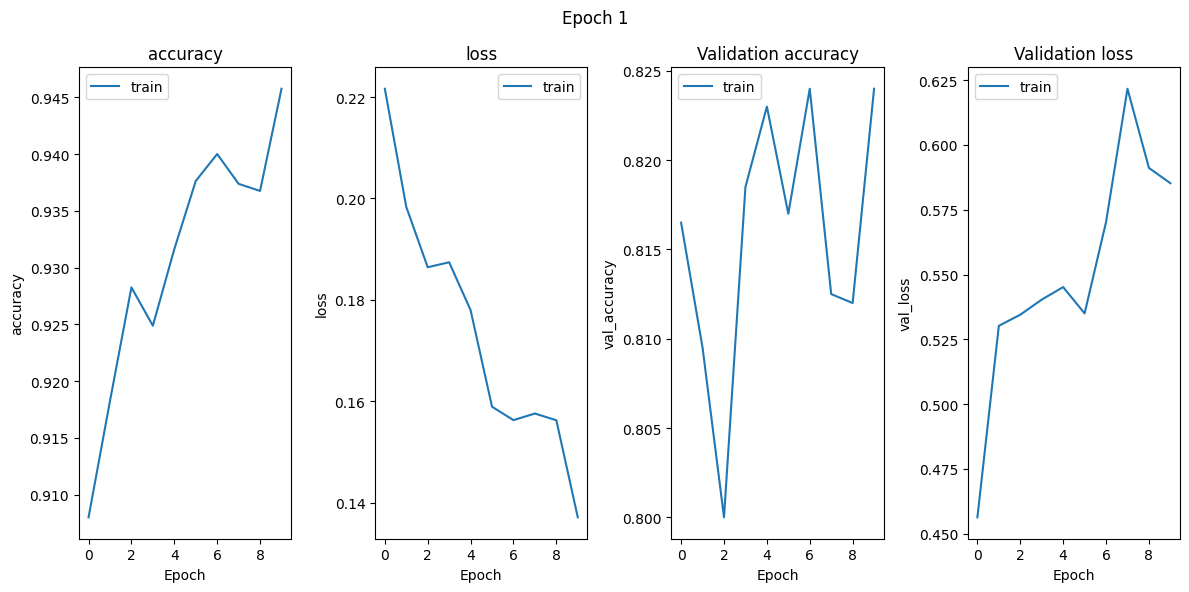

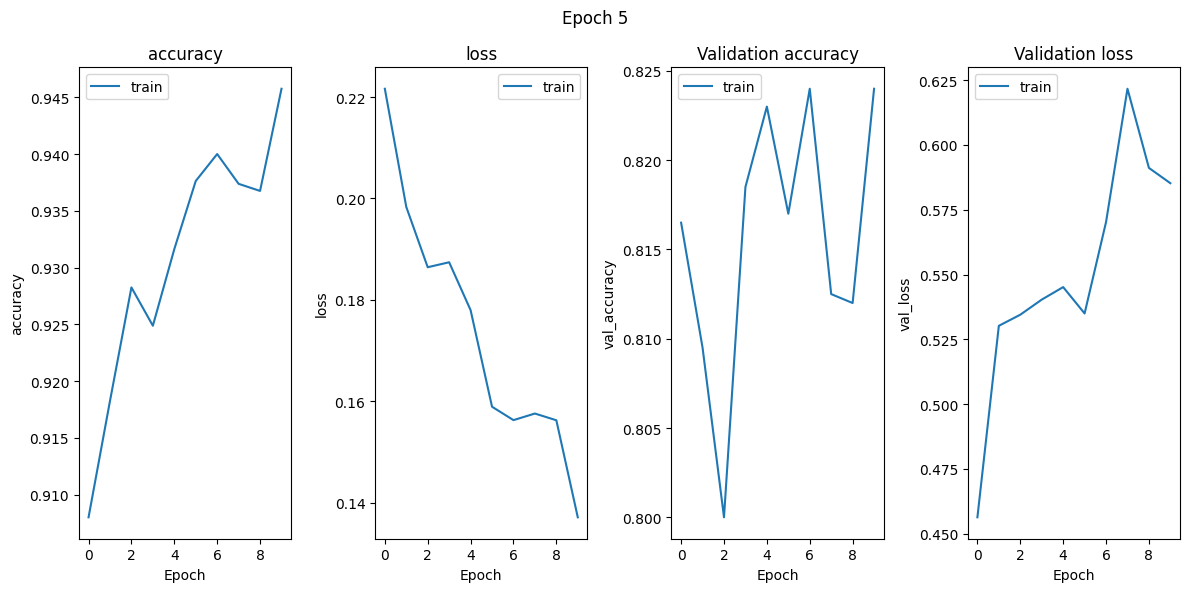

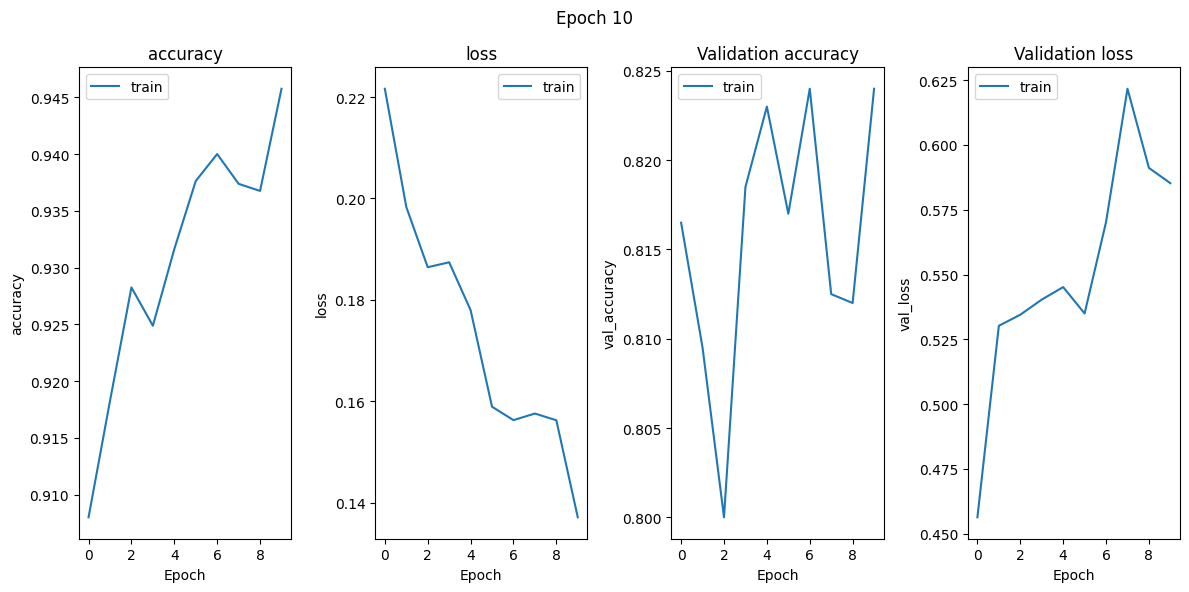

In [57]:
# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn.fit(x=training_set, validation_data=test_set, epochs=10)

# Plotting the training and validation metrics
epoch_indices = [0, 4, 9]  # Indices of the desired epochs

for epoch_index in epoch_indices:
    metrics = ['accuracy', 'loss', 'val_accuracy', 'val_loss']

    plt.figure(figsize=(12, 6))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 4, i+1)
        plt.plot(history.history[metric])

        # Check if metric starts with 'val_' to handle validation metrics correctly
        if metric.startswith('val_'):
            plt.title('Validation ' + metric[4:])
        else:
            plt.title(metric)

        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend(['train', 'val'])

    plt.suptitle('Epoch {}'.format(epoch_index + 1))
    plt.tight_layout()
    plt.show()

Making Predictions With Our Convolutional Neural Network

In [58]:
from tensorflow.keras.preprocessing import image

In [61]:
test_image_1 = image.load_img('/content/cats-and-dogs/predictions/cat_or_dog_1.jpg', target_size = (64, 64))

test_image_2 = image.load_img('/content/cats-and-dogs/predictions/cat_or_dog_2.jpg', target_size = (64, 64))


In [62]:
test_image_1 = image.img_to_array(test_image_1)

test_image_2 = image.img_to_array(test_image_2)

In [63]:
test_image_1 = np.expand_dims(test_image_1, axis = 0)

test_image_2 = np.expand_dims(test_image_2, axis = 0)

In [68]:
print(cnn.predict(test_image_1)) #Dog

1/1 [==============================] - 0s 27ms/step
[[1.]]


In [69]:
print(cnn.predict(test_image_2)) #Cat

1/1 [==============================] - 0s 27ms/step
[[0.]]
